In [1]:
from helper import ReadandProcessData
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import itertools
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
X_test,y_test = ReadandProcessData("test")
X_train,y_train = ReadandProcessData("global_train")

['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']
['0' '0' '0' ... '11' '11' '11']
['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']
['0' '0' '0' ... '11' '11' '11']


In [10]:
model = load_model("best_model_densenet121.h5")

In [11]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(ele) for ele in y_pred]

35/35 [==============================] - 54s 1s/step


In [5]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
            
    if savefig:
        fig.savefig("confusion_matrix.png")

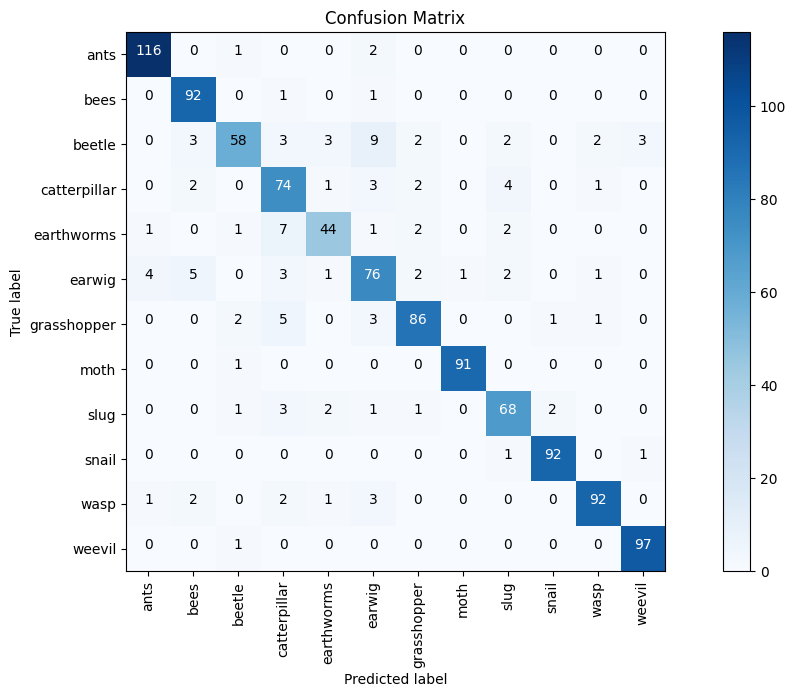

In [12]:
make_confusion_matrix(y_test,y_pred,os.listdir("test"))